# Market Basket Analysis and Sales Insights Using Online Retail Data

1. Import Required Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set visualization style
sns.set_style("whitegrid")
sns.set_context("talk")

### 2. Load the Dataset

In [3]:
df=pd.read_excel("Online Retail.xlsx")
print("The Top 5 records")
print(df.head())

The Top 5 records
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


2.1 Basic Dataset Information

In [4]:
print("\nDataset information")
print(df.info())



Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:

print("\nDataset description")
print(df.describe())


Dataset description
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [6]:
print("Dataset Shape",df.shape)
df.head()

Dataset Shape (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


2.2 Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


2.3 Statistical Summary

In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


2.4 Initial Observations

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 3. Data Preprocessing
##### Handling Missing Values

In [10]:
df.dropna(subset=['CustomerID'],inplace=True)
df['Description']=df['Description'].str.strip()

3.2 Removal of Cancelled Transactions

In [11]:
df=df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


3.3 Outlier & Invalid Data Removal

In [12]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]

3.4 Data Cleaning Summary

In [13]:
print("Cleaned Dataset shape",df.shape)

Cleaned Dataset shape (397884, 8)


### 4.Feature Engineering
4.1 TotalPrice

In [14]:
df.loc[:, 'TotalPrice'] = df['Quantity'] * df['UnitPrice']


4.2 Date & Time Features

In [15]:
df.loc[:, 'InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.loc[:, 'Year'] = df['InvoiceDate'].dt.year
df.loc[:, 'Month'] = df['InvoiceDate'].dt.month
df.loc[:, 'Day'] = df['InvoiceDate'].dt.day
df.loc[:, 'Hour'] = df['InvoiceDate'].dt.hour


### KPI SUMMARY


In [16]:
print("\n KEY PERFORMANCE INDICATORS")
print("Total Transactions :", df['InvoiceNo'].nunique())
print("Total Customers    :", df['CustomerID'].nunique())
print("Total Products     :", df['Description'].nunique())
print("Total Revenue (£)  :", round(df['TotalPrice'].sum(), 2))


 KEY PERFORMANCE INDICATORS
Total Transactions : 18532
Total Customers    : 4338
Total Products     : 3866
Total Revenue (£)  : 8911407.9


### 5. Exploratory Data Analysis (EDA)
5.1 Top 10 Most Sold Products

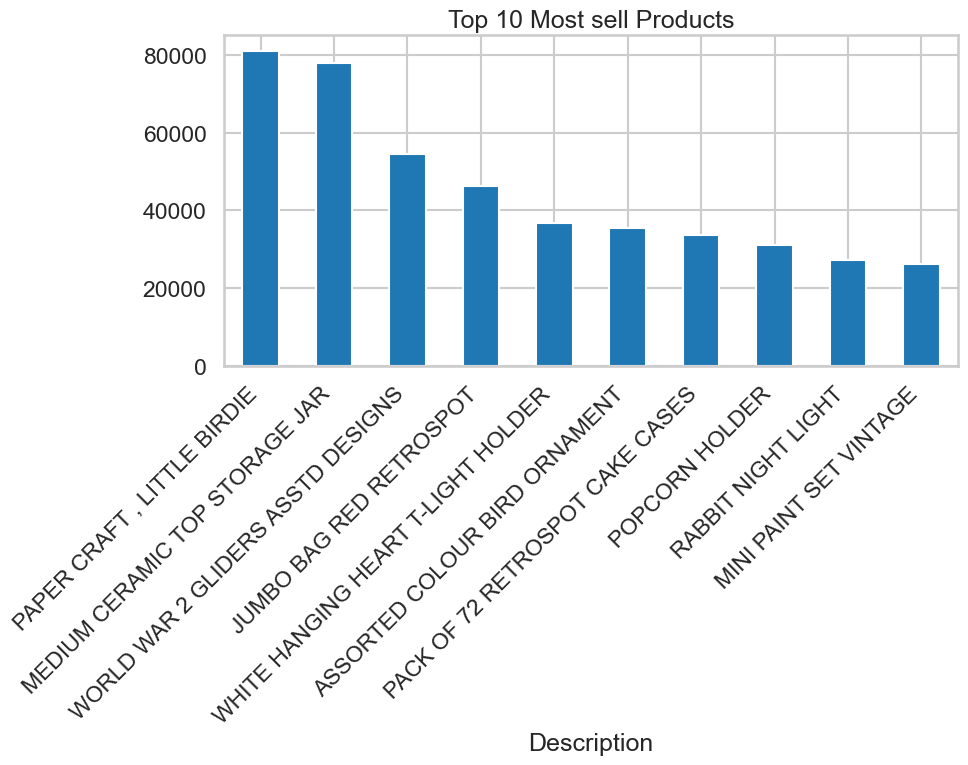

In [17]:
top_products=(
    df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
)

top_products.plot(kind='bar',figsize=(10,8),title="Top 10 Most sell Products")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

5.2 Country-wise Order Distribution

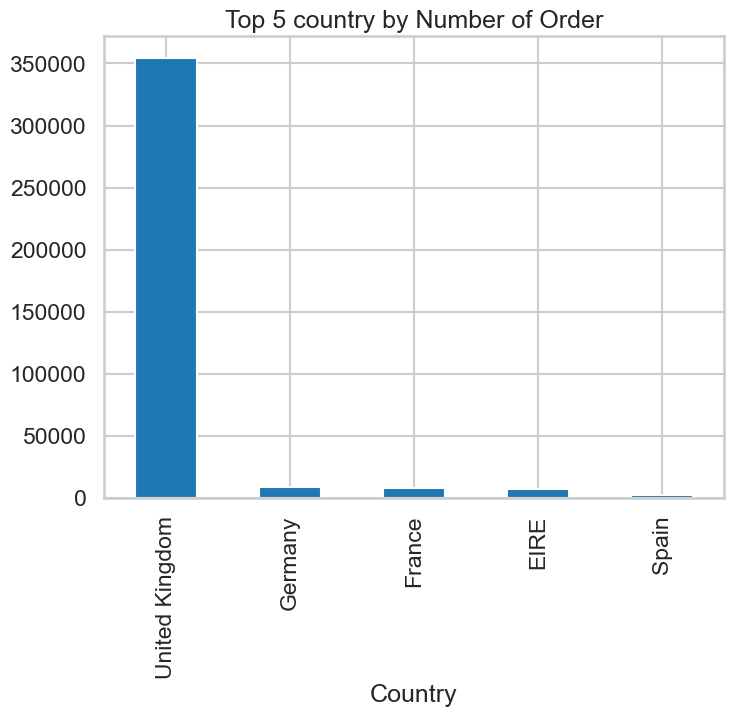

In [18]:
df['Country'].value_counts().head().plot(kind='bar',figsize=(8,6))
plt.title("Top 5 country by Number of Order")
plt.show()

5.2 Quantity Distribution

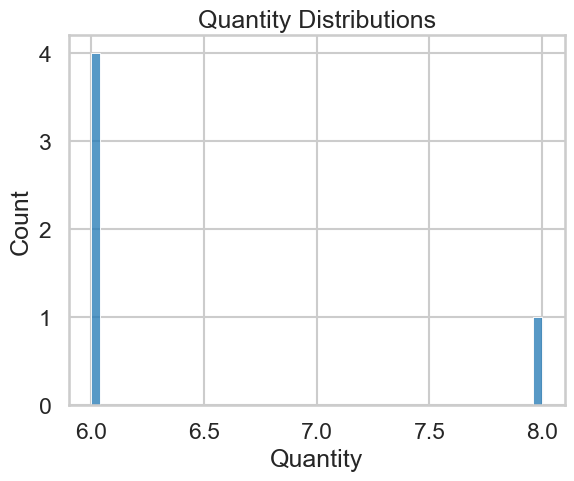

In [19]:
sns.histplot(df['Quantity'].head(),bins=50)
plt.title("Quantity Distributions")
plt.show()

5.3 Unit Price Distribution

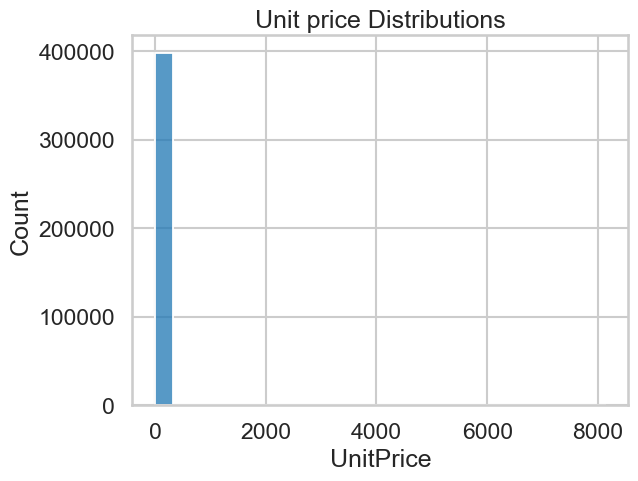

In [20]:
sns.histplot(df['UnitPrice'],bins=25)
plt.title("Unit price Distributions")
plt.savefig("unit_price Distributions",dpi=300,bbox_inches="tight")
plt.show()

5.5 Sales Contribution by Products

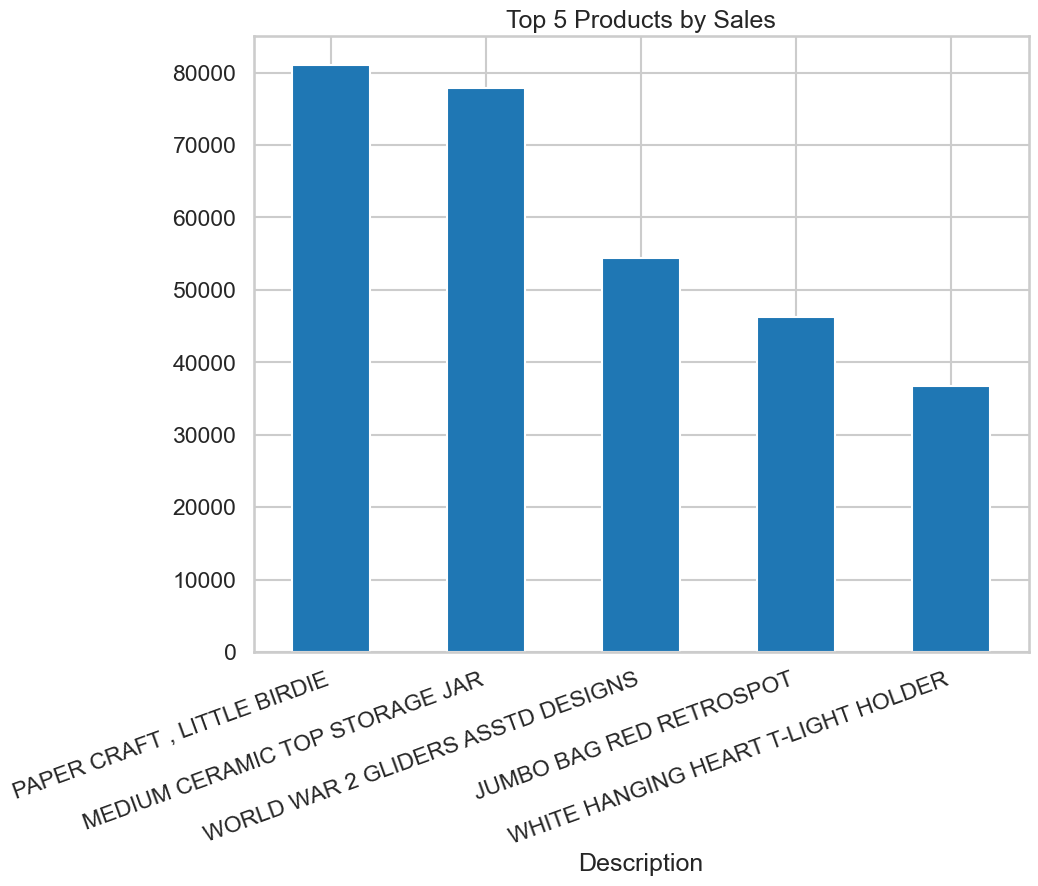

In [21]:
product_sales = (
    df.groupby("Description")['Quantity']
      .sum()
      .sort_values(ascending=False)
      .head()
)

product_sales.plot(
    kind='bar',
    figsize=(10, 8),
    title="Top 5 Products by Sales"
)

plt.xticks(rotation=20, ha='right') 
plt.savefig("Sales_by_top_5_products.png", dpi=300, bbox_inches='tight')
plt.show()


5.6 Top 10 Best-Selling Products (By Quantity)

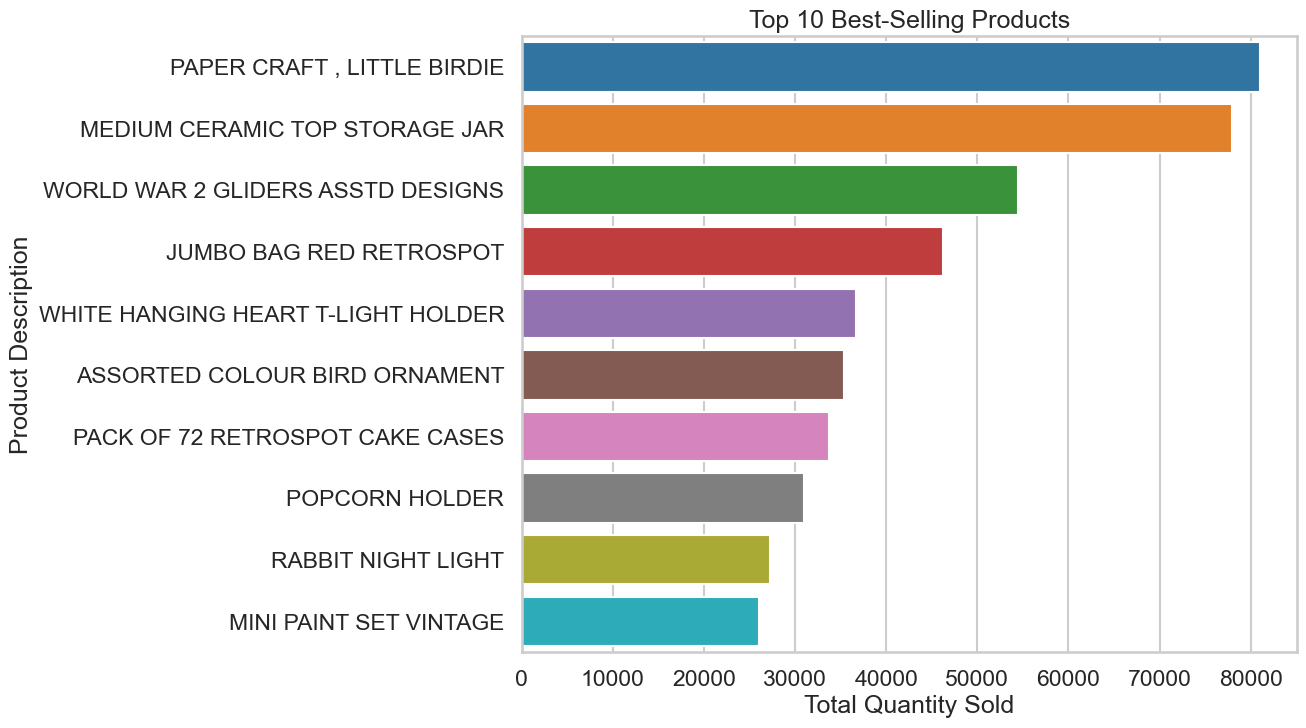

In [22]:
# Top 10 products by quantity sold
top_products=(
    df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
)

plt.figure(figsize=(10,8))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    hue=top_products.index,
    palette='tab10',
    legend=False              
)
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.title("Top 10 Best-Selling Products")
plt.savefig("Top 10 Best-Selling products",dpi=300,bbox_inches='tight')
plt.show()

5.6 Top 10 Revenue-Generating Products

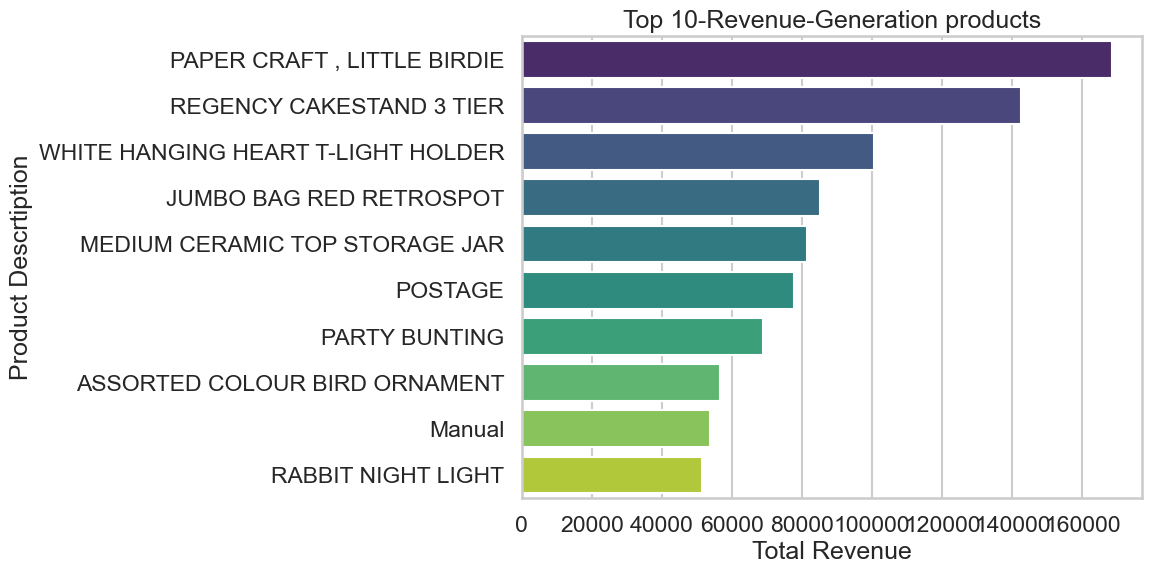

In [23]:
top_revenue=(
    df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
)

plt.figure(figsize=(8,6))
sns.barplot(
    x=top_revenue.values,
    y=top_revenue.index,
    palette='viridis'
)

plt.xlabel("Total Revenue")
plt.ylabel("Product Descrtiption")
plt.title("Top 10-Revenue-Generation products")
plt.savefig("Top 10-Revenue Products",dpi=300,bbox_inches='tight')
plt.show()

5.7 Sales Distribution by Country (Top 5 – Pie Chart)

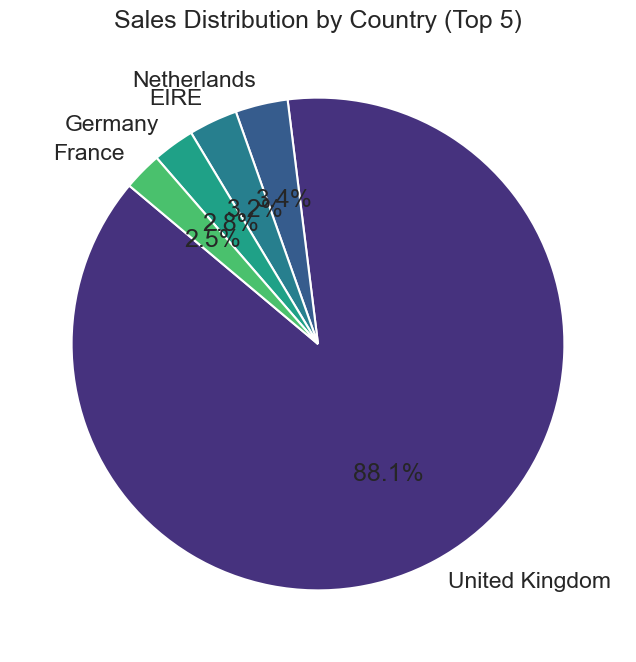

In [24]:
top_countries=(
    df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
)

plt.figure(figsize=(8, 8))
plt.pie(top_countries,labels=top_countries.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=sns.color_palette('viridis')
        )
plt.title("Sales Distribution by Country (Top 5)")
plt.savefig("Top 5 Sales Distributions by country",dpi=300,bbox_inches='tight')
plt.show()

### 6. Association Rules – Data Preparation
Basket Creation

In [25]:
basket = (
    df[df['Country'] == 'United Kingdom']
    .groupby(['InvoiceNo', 'Description'])['Quantity']
    .sum()
    .unstack()
    .fillna(0)
)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
print("Basket Shape:", basket.shape)

Basket Shape: (16646, 3833)


### 7.Apriori Algorithm
7.1 Frequent Itemset Generation

In [26]:
frequent_itemsets_apriori = apriori(
    basket,
    min_support=0.02,
    use_colnames=True
)

rules_apriori = association_rules(
    frequent_itemsets_apriori,
    metric="lift",
    min_threshold=1
).sort_values(by='lift', ascending=False)

print("\nTop Apriori Rules")
print(rules_apriori[['antecedents','consequents','support','confidence','lift']].head(10))


Top Apriori Rules
                                          antecedents  \
75                  (GREEN REGENCY TEACUP AND SAUCER)   
70  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
73                   (PINK REGENCY TEACUP AND SAUCER)   
72  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...   
5                   (GREEN REGENCY TEACUP AND SAUCER)   
4                    (PINK REGENCY TEACUP AND SAUCER)   
71  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
74                  (ROSES REGENCY TEACUP AND SAUCER)   
6                   (ROSES REGENCY TEACUP AND SAUCER)   
7                   (GREEN REGENCY TEACUP AND SAUCER)   

                                          consequents   support  confidence  \
75  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...  0.020485    0.557190   
70                  (GREEN REGENCY TEACUP AND SAUCER)  0.020485    0.890339   
73  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...  0.020485    0.691684   
72                   (PINK REGENCY TE

### 8 FP-Growth Algorithm
8.1 Frequent Itemset Generation

In [27]:
frequent_itemsets_fp = fpgrowth(
    basket,
    min_support=0.02,
    use_colnames=True
)

rules_fp = association_rules(
    frequent_itemsets_fp,
    metric="lift",
    min_threshold=1
).sort_values(by='lift', ascending=False)

print("\nTop FP-Growth Rules")
print(rules_fp[['antecedents','consequents','support','confidence','lift']].head(10))



Top FP-Growth Rules
                                          antecedents  \
54  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
59                  (GREEN REGENCY TEACUP AND SAUCER)   
57                   (PINK REGENCY TEACUP AND SAUCER)   
56  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...   
51                  (GREEN REGENCY TEACUP AND SAUCER)   
50                   (PINK REGENCY TEACUP AND SAUCER)   
55  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
58                  (ROSES REGENCY TEACUP AND SAUCER)   
49                  (GREEN REGENCY TEACUP AND SAUCER)   
48                  (ROSES REGENCY TEACUP AND SAUCER)   

                                          consequents   support  confidence  \
54                  (GREEN REGENCY TEACUP AND SAUCER)  0.020485    0.890339   
59  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...  0.020485    0.557190   
57  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...  0.020485    0.691684   
56                   (PINK REGENCY 

### 9 Comparative Analysis
Apriori vs FP-Growth

In [29]:
print("\nApriori Rule Count :", rules_apriori.shape[0])
print("FP-Growth Rule Count:", rules_fp.shape[0])


Apriori Rule Count : 76
FP-Growth Rule Count: 76


Rule Quality comperasion

In [31]:
rules_fp[['antecedents', 'consequents', 'confidence', 'lift']].head(10)


,antecedents,consequents,confidence,lift
54,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.890339,24.216650
59,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.557190,24.216650
57,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.691684,24.188581
56,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.716387,24.188581
51,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.660131,22.289120
50,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.819473,22.289120
55,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.844059,20.723028
58,(ROSES REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.502950,20.723028
49,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.777778,19.095706
48,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.702065,19.095706


Business Insights and Applications

In [30]:
strong_rules = rules_fp[
    (rules_fp['confidence'] >= 0.6) &
    (rules_fp['lift'] >= 1.2)
]
print("\nHigh-Confidence & High-Lift Rules")
print(strong_rules[['antecedents','consequents','confidence','lift']].head(10))


High-Confidence & High-Lift Rules
                                          antecedents  \
54  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
57                   (PINK REGENCY TEACUP AND SAUCER)   
56  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...   
51                  (GREEN REGENCY TEACUP AND SAUCER)   
50                   (PINK REGENCY TEACUP AND SAUCER)   
55  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
49                  (GREEN REGENCY TEACUP AND SAUCER)   
48                  (ROSES REGENCY TEACUP AND SAUCER)   
52                   (PINK REGENCY TEACUP AND SAUCER)   
74                (GARDENERS KNEELING PAD CUP OF TEA)   

                                          consequents  confidence       lift  
54                  (GREEN REGENCY TEACUP AND SAUCER)    0.890339  24.216650  
57  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...    0.691684  24.188581  
56                   (PINK REGENCY TEACUP AND SAUCER)    0.716387  24.188581  
51                   